<a href="https://colab.research.google.com/github/dinoboy22/Machine-learning-Math/blob/main/MLmath_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import add_dummy_feature
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge


In [26]:
np.random.seed(42)   #난수로 생성한 결과값이 특정한 하나의 결괏값으로 고정되도록 하는 함수
m = 100
X = 2*np.random.rand(m,1)              #0과 2사이의 독립 변수의 집합인 X 벡터를 생성
y = 4+3*X+np.random.randn(m,1)         # 종속 변수의 집합인 y벡터를 생성하는데 거기에 노이즈를 추가

In [27]:
X_b = add_dummy_feature(X)           #1로 이루어진 컬럼을 첫번째 컬럼에 추가
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @y         #정규 방정식을 코드로 표현한 것이고 numpy의 linalg 모듈에 있는 inv() 함수를 역행렬 계산을 위해 가져옴

In [28]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [29]:
X_new = np.array([[0],[2]])           #(2,1)의 array 생성
X_new_b = add_dummy_feature(X_new)    #1로 이루어진 컬럼을 첫번째 컬럼에 추가
y_predict = X_new_b @ theta_best       #가중치와 행렬 곱셈을 수행해 예측값 생성
y_predict

array([[4.21509616],
       [9.75532293]])

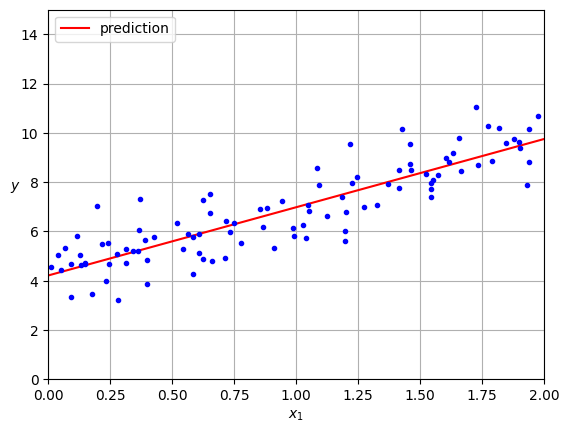

In [30]:
#데이터 시각화
plt.plot(X_new, y_predict, "r-", label="prediction")       #X_new 데이터셋에 대한 모델의 예측값을 시각화(빨간색 실선)
plt.plot(X,y,"b.")                    #파란색 점인 특성 데이터 X와 이에 따른 타겟 데이터 y 값을 시각화
plt.xlabel("$x_1$")                   #x축의 이름 생성
plt.ylabel("$y$", rotation=0)         #y축의 이름 생성
plt.axis([0, 2, 0, 15])               #그래프 그릴 때 x축의 범위=[0,2], y축의 범위=[0,15]
plt.grid()                            #격자 무늬 생성
plt.legend(loc="upper left")          #아래 그래프에서 prediction이 빨간선이라고 안내해주는 표지 생성하는 코드
plt.show()                            #실행

In [31]:
lin_reg = LinearRegression()   #LinearRegression 객체 호출
lin_reg.fit(X,y)               #선형 회귀 모델 lin_reg을 활용해 우리가 생성한 데이터 X와 타겟 데이터 y에 대해 학습을 진행
print(lin_reg.intercept_)      #intercept_라는 명령어로 훈련된 모델의 y절편을 출력
print(lin_reg.coef_)           #coef_ 를 사용해서 훈련된 모델의 계수 출력
lin_reg.predict(X_new)         #새로운 feature X_new에 대한 예측값 계산

[4.21509616]
[[2.77011339]]


array([[4.21509616],
       [9.75532293]])

In [32]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6) #위에서 만든 feature X_b와 타겟 데이터 y를 이용해서 최소 제곱 회귀를 수행하고
                                                                           #이 과정에서 rcond의 값보다 작은 특이값은 무시
theta_best_svd  #출력

array([[4.21509616],
       [2.77011339]])

In [33]:
np.linalg.pinv(X_b) @  y     #np.linalg.pinv() 함수를 이용하여 유사역행렬을 구하고 이를 이용해서 회귀 모델의 파라미터를 계산

array([[4.21509616],
       [2.77011339]])

In [ ]:
#경사하강법

In [34]:
eta = 0.1            #learning rate
n_epochs = 1000        #훈련 횟수
m = len(X_b)           #샘플 개수

np.random.seed(42)
theta = np.random.randn(2,1)                #2X1 벡터로 모델 파라미터를 랜덤하게 초기화

for epoch in range(n_epochs):
  gradients = 2 / m*X_b.T @ (X_b @ theta - y)            #비용 함수의 그레이디언트 벡터를 구하는 코드
  theta = theta - eta * gradients                        #위로 향하는 그레이디언트 벡터가 구해지면 반대 방향인 아래로 가야하므로 빼야하고 내려가는 스텝의
                                                         #크기를 결정하기 위해 여기에다가 학습률 eta를 곱해준 것


In [35]:
theta

array([[4.21509616],
       [2.77011339]])

In [36]:
n_epochs = 50                  #50번 반복
t0, t1 = 5, 50                 #학습 스케줄 파라미터(학습률 조절)
def learning_schedule(t):      #시간 스텝 t 변수에 대한 학습률을 계산하는 함수
  return t0 / (t+t1)

np.random.seed(42)             #위에서 설명했음
theta = np.random.rand(2,1)

for epoch in range(n_epochs):
  for iteration in range(m):
    random_index = np.random.randint(m)                     #랜덤하게 0~m-1 사이의 정수를 선택
    xi = X_b[random_index:random_index +1]                  #X_b 벡터에서 random_index 번째 인덱스에 있는 값으로 초기화
    yi = y[random_index:random_index +1]                    #y 벡터에서 random_index 번째 인덱스에 있는 값으로 초기화
    gradients = 2*xi.T @ (xi@theta - yi)                    #비용 함수의 편도함수 계산
    eta = learning_schedule(epoch*m + iteration)            #위의 함수를 정의해 놓은 것에 따라 처음에는 학습률을 크게, 시간이 지날수록 학습률을 줄여나가고
                                                            #시간 스텝에 따라 학습률을 초기화
    theta = theta - eta*gradients                           #현재 모델 파라미터의 값들에서 업데이트할 양을 빼주고 초기화

In [37]:
theta

array([[4.21047895],
       [2.74881457]])

In [38]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)           #SGDRegressor 클래스를 이용하여 최대 1000번의 에포크동안 손실이 1e-5보다 작아질때까지
                                                            #0.01의 학습률로 100번 동안 반복했는데도 손실이 충분히 감소하지 않으면 훈련을 중지하도록 세팅
sgd_reg.fit(X, y.ravel())             #feature X와 타겟 데이터 y를 사용하여 SGD모델 훈련

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [39]:
sgd_reg.intercept_, sgd_reg.coef_               #절편과 계수 출력

(array([4.21278812]), array([2.77270267]))

In [ ]:
#다항회귀

In [40]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3       #-3에서 3 사이의 x값 생성
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)   #노이즈가 포함된 이차방정식 꼴의 데이터

In [42]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)       #2차 다항식의 특성으로 생성하고, 편향항은 생성하지 않는다
X_poly = poly_features.fit_transform(X)               #fit.transform() 메소드를 활용해 poly_feature의 차수와 특성을 바탕으로 X에 대한 변환을 학습한다
print(X[0])            #확인
X_poly[0]

[-0.75275929]


array([-0.75275929,  0.56664654])

In [44]:
lin_reg = LinearRegression()            #LinearRegression 객체 호출
lin_reg.fit(X_poly, y)             #선형 회귀 모델 lin_reg을 활용해 우리가 만든 데이터 X_poly와 타켓 데이터 y에 대해 학습을 진행
lin_reg.intercept_, lin_reg.coef_        #모델의 y 절편을 의미, 모델의 특성에 대해 가중치를 의미(weights)

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

In [ ]:
#학습 곡선

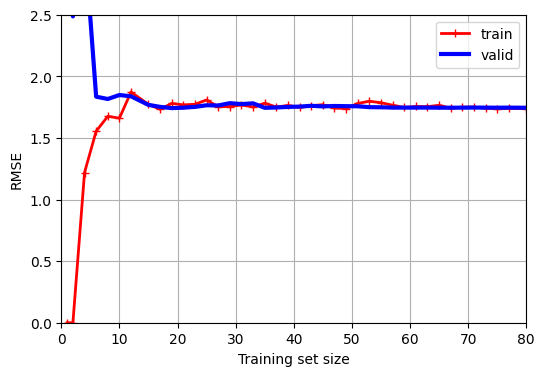

In [45]:
train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")  #학습 곡선을 계산하는 함수인 learning curve를 불러와 어떤 모델인지, feature data, 타겟 데이터, 훈련 세트 사이즈,
                                            #교차 검증을 위한 fold의수, validation 지표를 입력
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)   #mean(axis=1) 메소드를 사용해서 각 행에 대한 평균을 계산한 후 각 훈련 세트 크기에서의 평균 RMSE를 얻음(train, test)


#위에서와 동일한 matplotlib을 활용한 데이터 시각화 구현 코드
plt.figure(figsize=(6, 4))    #그래프의 크기 조절
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 80, 0, 2.5])
plt.show()

In [46]:
polynomial_regression = make_pipeline(            #파이프라인은 전처리의 각 단계, 모델 생성, 학습 등을 포함하는 머신러닝 프로세스를 한번에 처리하는 클래스
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())             #10차 다항식의 특성으로 생성하고, 편향항은 생성하지 않는다. 최종 estimator는 LinearRegression

train_sizes, train_scores, valid_scores = learning_curve(  #위에서 설명한 learning curve 함수를 불러오는데 우리가 바로 위에서 세팅한 10차 다항 회귀 모델을 넣어줌
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")

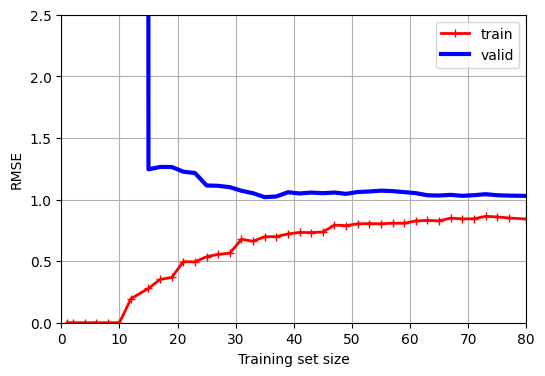

In [47]:
train_errors = -train_scores.mean(axis=1) #mean(axis=1) 메소드를 사용해서 각 행에 대한 평균을 계산한 후 각 훈련 세트 크기에서의 평균 RMSE를 얻음(train, test)
valid_errors = -valid_scores.mean(axis=1)

#위에서 설명한 데이터 시각화
plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, 80, 0, 2.5])
plt.show()

In [50]:
ridge_reg = Ridge(alpha=0.1, solver="cholesky")           #릿지 회귀의 비용 함수의 가장 주요한 변수인 알파값을 넣어주고
                                                         #숄레스키의 행렬 분해를 이용하여 릿지 회귀 정규 방정식을 변형하여 넣어주고 계산하는 함수
ridge_reg.fit(X, y)                                      #데이터셋 넣어주고 피팅
ridge_reg.predict([[1.5]])                               #새로운 데이터 넣어주고 예측(책의 값이랑 다른 것은 X,y를 다르게 정의했기 때문)

array([[4.82899748]])

In [51]:
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1 / m, tol=None,            #릿지 회귀를 적용한 SGD 회귀 모델을 훈련
                       max_iter=1000, eta0=0.01, random_state=42)        #알파와  m 하이퍼파라미터 넣어주고 허용 오차는 지정X, 최대 반복 횟수 100, 초기 학습류 0.01
sgd_reg.fit(X, y.ravel())                                                #y.ravel()을 이용하여 타겟 데이터를 1차원 배열로 만들어준 다음 모델에 데이터 넣어주고 훈련
sgd_reg.predict([[1.5]])                                                 #새로운 데이터 넣어주고 예측

array([4.82830117])